In [3]:
import os
os.environ["WANDB_DISABLED"] = "true"

import sys
sys.path.append('..')

%load_ext autoreload
%autoreload 2

In [4]:
import analyze_utils

checkpoint_folder = "/home/jxm3/research/retrieval/inversion/saves/98b1418d38c3f9333b17ab20bff06ff9/"
trainer = analyze_utils.load_trainer(checkpoint_folder)

Loading trainer for analysis – setting --do_eval=1
loading alias dpr_nq__msl32_beta from /home/jxm3/research/retrieval/inversion/saves/db66b9c01b644541fedbdcc59c53a285/ebb31d91810c4b62d2b55b5382e8c7ea...
Set train_args.dataloader_num_workers = 4


/home/jxm3/.conda/envs/torch/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[nltk_data] Downloading package wordnet to /home/jxm3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jxm3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jxm3/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


================ Begin trainer sanity check ================
	Input to encode -> Twas brillig, and the slithy toves, Did gyre and gimble in the wabe, All mimsy were the borogoves, And the mome raths outgrabe.
	Decoded output -> The mlbies wase wyst bograge; And the sliths and toms wre
================ End trainer sanity check ================


[nltk_data] Downloading package wordnet to /home/jxm3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jxm3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jxm3/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
trainer.eval_dataset.keys()

dict_keys(['ag_news', 'xsum_doc', 'xsum_summ', 'wikibio', 'nq'])

In [5]:
trainer.inversion_trainer.generate(inputs=eval_batch, generation_kwargs={
    "max_length": 32,
    "do_sample": False,
})

generation_kwargs: {'max_length': 32, 'do_sample': False}


tensor([[    0,    12,     8,  1848,    13,     8, 21995,     6,    84,    33,
          4352,  3050,    11,    73,    17,    76,    17, 13281,    16,     8,
           495,    13,  9806,  2629, 10471,     5,     3,  8739,     8,  2629,
         10471,     6]], device='cuda:0')

In [6]:
trainer.args.per_device_eval_batch_size = 8
eval_batch = next(iter(trainer.get_eval_dataloader(
    eval_dataset=trainer.eval_dataset["nq"]
)))

# eval_batch = {k: v[0:1, ...] for k,v in eval_batch.items()} # just one guy
eval_batch = {k: v.to(trainer.args.device) for k,v in eval_batch.items()}

gen_kwargs = {"max_length": 32,   "do_sample": False, }
trainer.inversion_trainer.contrastive_generation_alpha = 0.0
trainer.inversion_trainer.contrastive_generation_gamma = 1.0
b1 = trainer.inversion_trainer.generate_contrastive(inputs=eval_batch, generation_kwargs=gen_kwargs)
b2 = trainer.inversion_trainer.model.generate(inputs=eval_batch, generation_kwargs=gen_kwargs)

generation_kwargs: {'max_length': 32, 'early_stopping': True, 'num_beams': 1, 'do_sample': False}
ContrastiveLogitsProcessor alpha=0.0 gamma=1.0
generation_kwargs: {'max_length': 32, 'do_sample': False, 'logits_processor': [<models.logits_processors.ContrastiveLogitsProcessor object at 0x7fcba66fc2b0>], 'renormalize_logits': False}
generation_kwargs: {'max_length': 32, 'do_sample': False, 'logits_processor': [<models.logits_processors.ContrastiveLogitsProcessor object at 0x7fcba66fc2b0>], 'renormalize_logits': False}


In [7]:
(b1 == b2).all()

tensor(True, device='cuda:0')

## eval

In [9]:
trainer.inversion_trainer.evaluate(
    eval_dataset=trainer.eval_dataset["nq"]
)

generating from val:   0%|                                                                                                                                  | 0/3 [00:00<?, ?it/s]

generation_kwargs: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 3, 'min_length': 32, 'max_length': 32}


generating from val:  33%|████████████████████████████████████████▋                                                                                 | 1/3 [00:00<00:01,  1.01it/s]

generation_kwargs: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 3, 'min_length': 32, 'max_length': 32}


generating from val:  67%|█████████████████████████████████████████████████████████████████████████████████▎                                        | 2/3 [00:01<00:00,  1.16it/s]

generation_kwargs: {'early_stopping': False, 'num_beams': 1, 'do_sample': False, 'no_repeat_ngram_size': 3, 'min_length': 32, 'max_length': 32}


to the character of the skull, which are relatively smooth and untutuous in the case of infant sutures. Unlike the sutures,
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay gold medal, and was also part of the Australian Short Track team, which won gold
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as men, and 75% agreed that they should be protected from discrimination. Among the other 15%, gay workers are no longer exp
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 1.0522613525390625,
 'eval_accuracy': 0.7386067708333334,
 'eval_bleu_score': 28.897897788124407,
 'eval_meteor_score': 0.5641452367467923,
 'eval_rouge_score': 0.6308596689442678,
 'eval_bert_score': 0.9140833147491018,
 'eval_emb_cos_sim': 0.9019443988800049,
 'eval_perplexity': 2.8641205867926014,
 'eval_runtime': 11.8331,
 'eval_samples_per_second': 42.254,
 'eval_steps_per_second': 0.338}

In [10]:
trainer.inversion_trainer.gen_kwargs

{'early_stopping': False,
 'num_beams': 1,
 'do_sample': False,
 'no_repeat_ngram_size': 3}

In [9]:
trainer.inversion_trainer.generation_strategy = "none"
trainer.inversion_trainer.gen_kwargs["no_repeat_ngram_size"] = 0
trainer.inversion_trainer.evaluate(
    eval_dataset=trainer.eval_dataset["nq"]
)

to the character of the skull, which are relatively smooth and untutuous in the case of infant sutures. Unlike the sutures,
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay gold medal, and was also part of the Australian Short Track team, which won gold
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as men, and 75% agreed that they should be protected from discrimination. Among the other 15%, gay workers are no longer exp
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 1.0522613525390625,
 'eval_accuracy': 0.7386067708333334,
 'eval_bleu_score': 31.876985502984844,
 'eval_meteor_score': 0.5792206976897826,
 'eval_rouge_score': 0.6414878805144706,
 'eval_bert_score': 0.9177108293709656,
 'eval_emb_cos_sim': 0.9062262773513794,
 'eval_perplexity': 2.8641205867926014,
 'eval_runtime': 5.1472,
 'eval_samples_per_second': 97.14,
 'eval_steps_per_second': 0.777}

In [ ]:
trainer.inversion_trainer.generation_strategy = "none"
trainer.inversion_trainer.gen_kwargs["no_repeat_ngram_size"] = 0
trainer.inversion_trainer.evaluate(
    eval_dataset=trainer.eval_dataset["nq"]
)

In [9]:
trainer.inversion_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 8,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.args.per_device_eval_batch_size = 8
trainer.inversion_trainer.generation_strategy = "contrastive"
trainer.inversion_trainer.contrastive_generation_alpha = 0.0
trainer.inversion_trainer.contrastive_generation_gamma = 0.1
trainer.inversion_trainer.contrastive_generation_hypothesis_num_samples = 1
trainer.inversion_trainer.evaluate(
    eval_dataset=trainer.eval_dataset["nq"]
)

to that of the skulls of infant sutures, which are relatively smooth and untidy, despite the character of the skull. Thus
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win a Winter Olympic medal, and was part of the Southern Hemisphere relay team, which won
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as heterosexuals, and 75% agreed that they should be protected from discrimination and harassment. A third percent disagreed, with 15%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 1.0522613525390625,
 'eval_accuracy': 0.7386067708333334,
 'eval_bleu_score': 35.89950332695231,
 'eval_meteor_score': 0.6208194436428601,
 'eval_rouge_score': 0.6799594849664801,
 'eval_bert_score': 0.926268168259412,
 'eval_emb_cos_sim': 0.9201374053955078,
 'eval_perplexity': 2.8641205867926014,
 'eval_runtime': 57.796,
 'eval_samples_per_second': 8.651,
 'eval_steps_per_second': 0.069}

In [13]:
trainer.inversion_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 16,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.inversion_trainer.args.per_device_eval_batch_size = 16
trainer.inversion_trainer.generation_strategy = "contrastive"
trainer.inversion_trainer.contrastive_generation_alpha = 0.0
trainer.inversion_trainer.contrastive_generation_gamma = 0.1
trainer.inversion_trainer.contrastive_generation_hypothesis_num_samples = 16
trainer.inversion_trainer.evaluate(
    eval_dataset=trainer.eval_dataset["nq"]
)

# *-*-* with num beams 8 *-*-*
# 1: 35.89
# 2: 36.00
# 4: 36.05
# 16: 36.15

to that of the skulls of infant sutures, which are relatively smooth and untidy, despite the character of the skull. Thus
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win a Winter Olympic medal, and was part of the Southern Hemisphere relay team, which won
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 37% disagreed on whether or not they should be protected from harassment or discrimination. In addition, 15% worked
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 1.051361083984375,
 'eval_accuracy': 0.7367691532258065,
 'eval_bleu_score': 37.17726129377233,
 'eval_meteor_score': 0.6329410981951079,
 'eval_rouge_score': 0.6894040736036922,
 'eval_bert_score': 0.928007015537831,
 'eval_emb_cos_sim': 0.9250889420509338,
 'eval_perplexity': 2.861543269404452,
 'eval_runtime': 1793.8923,
 'eval_samples_per_second': 0.279,
 'eval_steps_per_second': 0.018}

In [5]:
trainer.inversion_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 16,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.args.per_device_eval_batch_size = 16
trainer.inversion_trainer.generation_strategy = "contrastive"
trainer.inversion_trainer.contrastive_generation_alpha = 0.0
trainer.inversion_trainer.contrastive_generation_gamma = 0.1
trainer.inversion_trainer.contrastive_generation_hypothesis_temperature = 0
trainer.inversion_trainer.evaluate(
    eval_dataset=trainer.eval_dataset["nq"]
)

to that of the skulls of infant sutures, which are relatively smooth and untidy, despite the character of the skull. Thus
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win a Winter Olympic medal, and was part of the Southern Hemisphere relay team, which won
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as heterosexuals, and 75% disagreed on whether or not they should be protected from discrimination. A third 15% said workplace 
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 1.0522613525390625,
 'eval_accuracy': 0.7386067708333334,
 'eval_bleu_score': 35.851109816909826,
 'eval_meteor_score': 0.6182559446289986,
 'eval_rouge_score': 0.6787915787931255,
 'eval_bert_score': 0.9271585076736907,
 'eval_emb_cos_sim': 0.9183868169784546,
 'eval_perplexity': 2.8641205867926014,
 'eval_runtime': 111.8187,
 'eval_samples_per_second': 4.472,
 'eval_steps_per_second': 0.036}

In [10]:
trainer.inversion_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 16,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.inversion_trainer.generation_strategy = "none"
trainer.inversion_trainer.evaluate(
    eval_dataset=trainer.eval_dataset["nq"]
)

to that of the skulls of infant sutures, which are relatively smooth and untidy, despite the character of the skull. Thus
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win a Winter Olympic medal, and was part of the Australian relay team which won the short track gold medal
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as heterosexuals, and 75% agreed that they should be protected from discrimination. A third percent disagreed, with 15% working-
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 1.0522613525390625,
 'eval_accuracy': 0.7386067708333334,
 'eval_bleu_score': 34.38770566406594,
 'eval_meteor_score': 0.6086048916920719,
 'eval_rouge_score': 0.6688751877536816,
 'eval_bert_score': 0.9240348972380161,
 'eval_emb_cos_sim': 0.9167592525482178,
 'eval_perplexity': 2.8641205867926014,
 'eval_runtime': 24.2636,
 'eval_samples_per_second': 20.607,
 'eval_steps_per_second': 0.165}

In [13]:
trainer.inversion_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": True,
    "temperature": 1.0,
    "top_p": 0.1,
    "no_repeat_ngram_size": 0,
}
trainer.inversion_trainer.generation_strategy = "none"
trainer.inversion_trainer.evaluate(
    eval_dataset=trainer.eval_dataset["nq"]
)

to the character of the skull, which are relatively smooth and untutuous in the case of infant sutures. Unlike the sutures,
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay gold medal, and was also part of the Australian Short Track team, which won gold
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as men, and 75% agreed that they should be protected from discrimination. Among the other 15%, gay workers are no longer exp
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 1.0522613525390625,
 'eval_accuracy': 0.7386067708333334,
 'eval_bleu_score': 31.874603435462316,
 'eval_meteor_score': 0.5797198638767634,
 'eval_rouge_score': 0.642425000059837,
 'eval_bert_score': 0.9176754048094153,
 'eval_emb_cos_sim': 0.9073807001113892,
 'eval_perplexity': 2.8641205867926014,
 'eval_runtime': 9.5017,
 'eval_samples_per_second': 52.622,
 'eval_steps_per_second': 0.421}

In [ ]:
trainer.inversion_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 32,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.args.per_device_eval_batch_size = 1
trainer.inversion_trainer.generation_strategy = "contrastive"
trainer.inversion_trainer.evaluate(
    eval_dataset=trainer.eval_dataset["nq"]
)

In [4]:
trainer.inversion_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 32,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.args.per_device_eval_batch_size = 8
trainer.inversion_trainer.generation_strategy = "none"
trainer.inversion_trainer.evaluate(
    eval_dataset=trainer.eval_dataset["nq"]
)

to that of the skulls of infant sutures, which are relatively smooth and untidy, despite the character of the skull. Thus
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win a Winter Olympic medal, and was part of the Australian relay team which won the short track gold medal
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as heterosexuals, and 75% agreed that they should be protected from discrimination. A third percent disagreed, with 15% working-
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 1.0522613525390625,
 'eval_accuracy': 0.7386067708333334,
 'eval_bleu_score': 34.23656384105194,
 'eval_meteor_score': 0.6045403454876508,
 'eval_rouge_score': 0.6684703456137346,
 'eval_bert_score': 0.9242021244329711,
 'eval_emb_cos_sim': 0.9140585660934448,
 'eval_perplexity': 2.8641205867926014,
 'eval_runtime': 42.4497,
 'eval_samples_per_second': 11.779,
 'eval_steps_per_second': 0.094}

### reminder to self

potential improvements
- sample more negative examples (nucleus sampling?)
- hyperparam tuning (better alpha)
- other tricks from contrastive decoding paper

## hyperparam search

In [32]:
print("check")

check


In [37]:
trainer.inversion_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.args.per_device_eval_batch_size = 32
trainer.inversion_trainer.generation_strategy = "contrastive"
trainer.inversion_trainer.contrastive_generation_alpha = 0.0
trainer.inversion_trainer.contrastive_generation_gamma = 0.1
trainer.inversion_trainer.contrastive_generation_hypothesis_temperature = 0
trainer.inversion_trainer.contrastive_generation_hypothesis_num_samples = 1
trainer.inversion_trainer.evaluate(
    eval_dataset=trainer.eval_dataset["nq"]
)

to that of the skull of infants, which are relatively smooth and untutorous in character. Nevertheless, the sutures of the skull
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. Moreover, 35% agreed that they should be protected from workplace discrimination. 75%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 1.0522613525390625,
 'eval_accuracy': 0.7386067708333334,
 'eval_bleu_score': 33.98037368971617,
 'eval_meteor_score': 0.601873441349148,
 'eval_rouge_score': 0.6646144531814782,
 'eval_bert_score': 0.9221128020435572,
 'eval_emb_cos_sim': 0.9135487079620361,
 'eval_perplexity': 2.8641205867926014,
 'eval_runtime': 12.6541,
 'eval_samples_per_second': 39.513,
 'eval_steps_per_second': 0.316}

In [ ]:
data = []
#
for temp in [1e-19, 0.001, 0.01, 0.1, 1.0]:
    for num_samples in [16, 8, 4, 2, 1]:
        trainer.args.per_device_eval_batch_size = round(32 / num_samples)
        #
        trainer.inversion_trainer.contrastive_generation_hypothesis_temperature = temp
        trainer.inversion_trainer.contrastive_generation_hypothesis_num_samples = num_samples
        #
        trainer.inversion_trainer.gen_kwargs = {
            "early_stopping": False,
            "num_beams": 1,
            "do_sample": False,
            "no_repeat_ngram_size": 0,
        }
        trainer.inversion_trainer.generation_strategy = "contrastive"
        trainer.inversion_trainer.contrastive_generation_alpha = 0.0
        trainer.inversion_trainer.contrastive_generation_gamma = 0.1
        metrics = trainer.inversion_trainer.evaluate(
            eval_dataset=trainer.eval_dataset["nq"]
        )
        metrics['temp'] = temp
        metrics['num_samples'] = num_samples
        data.append(metrics)

to that of the skull of infants, which are relatively smooth and untutorous in character. Nevertheless, the sutures of the skull
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. Moreover, 35% agreed that they should be protected from workplace discrimination. 75%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


to that of the skull of infants, which are relatively smooth and untutorous in character. Nevertheless, the sutures of the skull
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. Moreover, 35% agreed that they should be protected from workplace discrimination. 75%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


to that of the skull of infants, which are relatively smooth and untutorous in character. Nevertheless, the sutures of the skull
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. Moreover, 35% agreed that they should be protected from workplace discrimination. 75%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


to that of the skull of infants, which are relatively smooth and untutorous in character. Nevertheless, the sutures of the skull
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. Moreover, 35% agreed that they should be protected from workplace discrimination. 75%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


to that of the skull of infants, which are relatively smooth and untutorous in character. Nevertheless, the sutures of the skull
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. Moreover, 35% agreed that they should be protected from workplace discrimination. 75%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


to that of the skull of infants, which are relatively smooth and untutorous in character. Nevertheless, the sutures of the skull
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. Moreover, 35% agreed that they should be protected from workplace discrimination. 75%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


to that of the skull of infants, which are relatively smooth and untutorous in character. Nevertheless, the sutures of the skull
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. Moreover, 35% agreed that they should be protected from workplace discrimination. 75%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


to that of the skull of infants, which are relatively smooth and untutorous in character. Nevertheless, the sutures of the skull
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. Moreover, 35% agreed that they should be protected from workplace discrimination. 75%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


to that of the skull of infants, which are relatively smooth and untutorous in character. Nevertheless, the sutures of the skull
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. Moreover, 35% agreed that they should be protected from workplace discrimination. 75%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


to that of the skull of infants, which are relatively smooth and untutorous in character. Nevertheless, the sutures of the skull
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. Moreover, 35% agreed that they should be protected from workplace discrimination. 75%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


to that of the skull of infants, which are relatively smooth and untutorous in character. Nevertheless, the sutures of the skull
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. Moreover, 35% agreed that they should be protected from workplace discrimination. 75%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


to that of the skull of infants, which are relatively smooth and untutorous in character. Nevertheless, the sutures of the skull
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. Moreover, 35% agreed that they should be protected from workplace discrimination. 75%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


to that of the skull of infants, which are relatively smooth and untutorous in character. Nevertheless, the sutures of the skull
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. Moreover, 35% agreed that they should be protected from workplace discrimination. 75%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


to that of the skull of infants, which are relatively smooth and untutorous in character. Nevertheless, the sutures of the skull
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. Moreover, 35% agreed that they should be protected from workplace discrimination. 75%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


to that of the skull of infants, which are relatively smooth and untutorous in character. Nevertheless, the sutures of the skull
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. Moreover, 35% agreed that they should be protected from workplace discrimination. 75%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


to the character of the skull, which are relatively smooth and untutuous in the case of infant sutures. Unlike the sutures,
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay gold medal, and was also part of the Australian Short Track team, which won gold
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. Moreover, 35% agreed that they should be protected from workplace discrimination. 75%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


to that of the skull of infants, which are relatively smooth and untuturous in character. Nevertheless, the sutures of the skull
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay gold medal, and was also part of the Australian Short Track team, which won gold
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% agreed with discrimination. Lastly, 35% disagreed on whether or not protected workers should be 
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


to that of the skull of infants, which are relatively smooth and untuturous in character. Nevertheless, the sutures of the skull
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% disagreed. Moreover, 35% agreed that they should be protected from workplace discrimination. 75%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


to that of the skulls of infant sutures, which are relatively smooth and untoothful, despite the character of the skull. Moreover
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay gold medal, and was also part of the Australian Short Track team, which won gold
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% agreed that they should be protected from discrimination. Among the 35%, 15% disagreed with workplace
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


generating from val:  33%|██████████████████████████▎                                                    | 1/3 [00:03<00:06,  3.49s/it]

In [28]:
import pandas as pd

df = pd.DataFrame(data)
df.head()

,eval_loss,eval_accuracy,eval_bleu_score,eval_meteor_score,eval_rouge_score,eval_bert_score,eval_emb_cos_sim,eval_perplexity,eval_runtime,eval_samples_per_second,eval_steps_per_second,temp,num_samples
0,1.052261,0.738607,33.980374,0.601873,0.664614,0.922113,0.913549,2.864121,97.4374,5.131,0.041,1.000000e-19,16
1,1.052261,0.738607,33.980374,0.601873,0.664614,0.922113,0.913549,2.864121,53.6291,9.323,0.075,1.000000e-19,8
2,1.052261,0.738607,33.980374,0.601873,0.664614,0.922113,0.913549,2.864121,29.6616,16.857,0.135,1.000000e-19,4
3,1.052261,0.738607,33.980374,0.601873,0.664614,0.922113,0.913549,2.864121,18.2489,27.399,0.219,1.000000e-19,2
4,1.052261,0.738607,33.980374,0.601873,0.664614,0.922113,0.913549,2.864121,12.3650,40.437,0.323,1.000000e-19,1


In [29]:
df.pivot(index='temp', columns='num_samples', values='eval_bleu_score')

num_samples,1,2,4,8,16
temp,,,,,
1.000000e-19,33.980374,33.980374,33.980374,33.980374,33.980374
1.000000e-03,34.014956,33.992007,33.940989,33.846008,33.893838
1.000000e-02,33.844591,33.696034,33.625246,33.653909,33.760405
1.000000e-01,33.642460,34.198803,33.676462,34.022342,33.991115
1.000000e+00,33.013219,32.775569,32.921130,33.227183,33.269312


<Axes: xlabel='num_samples', ylabel='temp'>

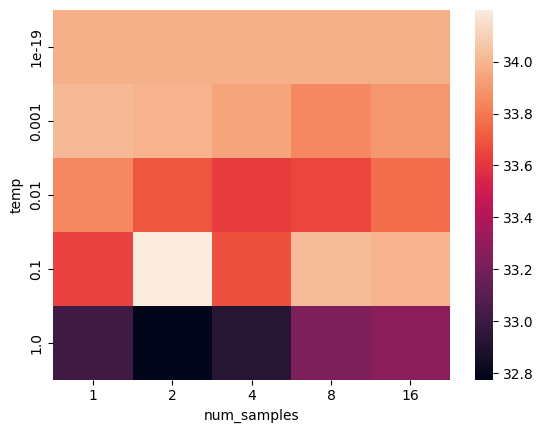

In [26]:
import seaborn as sns

sns.heatmap(df.pivot(index='temp', columns='num_samples', values='eval_bleu_score'))

<Axes: xlabel='num_samples'>

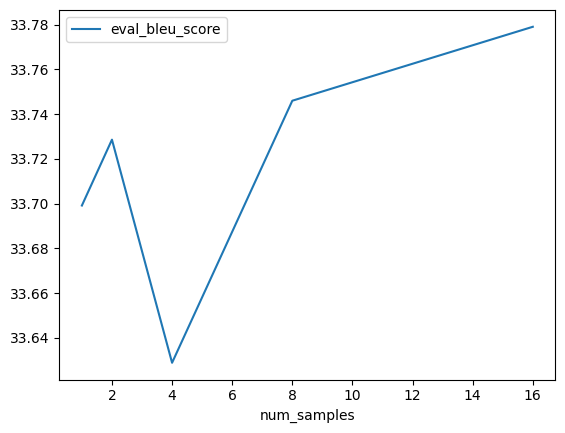

In [30]:
df.groupby('num_samples').mean().reset_index().plot(kind='line', x='num_samples', y='eval_bleu_score')

<Axes: xlabel='temp'>

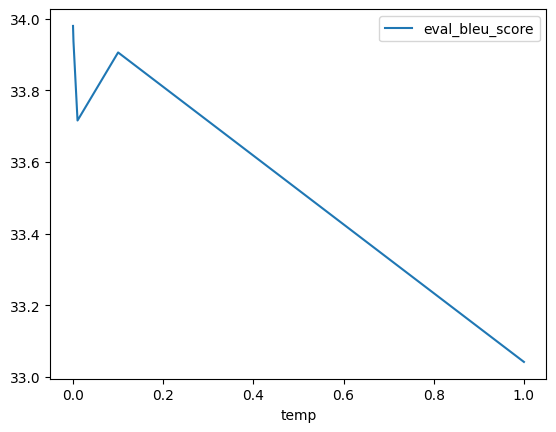

In [27]:
df.groupby('temp').mean().reset_index().plot(kind='line', x='temp', y='eval_bleu_score')

## reranking

In [22]:
trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.inversion_trainer.generation_strategy = "none"
trainer.args.per_device_eval_batch_size = 32
trainer.reranking_method = "generate_before_embedder"
trainer.rerank_length = 1
trainer.beam_width = 16
trainer.evaluate(eval_dataset=trainer.eval_dataset["nq"])

so so that the skull structures of the sutures of the infant are smooth and untidy, albeit with character. Those of infant
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



team of from the Southern Hemisphere in order to win the Winter medal for Australia. Also was hoped would won a national short relay individual
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



eight, 45% of the same rights as men, and 3 percentage disagree. They also agreed: Straight workers should and should NOT if under discriminations
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 2.732191801071167,
 'eval_bleu_score': 12.351650367537667,
 'eval_meteor_score': 0.4318333528819784,
 'eval_rouge_score': 0.5204598284820936,
 'eval_bert_score': 0.8863357178866863,
 'eval_emb_cos_sim': 0.8777738809585571,
 'eval_runtime': 522.551,
 'eval_samples_per_second': 0.957,
 'eval_steps_per_second': 0.031}

In [ ]:
trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.inversion_trainer.generation_strategy = "none"
trainer.args.per_device_eval_batch_size = 32
trainer.reranking_method = "none"
trainer.rerank_length = 16
trainer.beam_width = 16
trainer.evaluate(eval_dataset=trainer.eval_dataset["nq"])

to that of the skulls of infant sutures, which are relatively smooth and untidy, despite the character of the skull. Thus
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay gold medal, and was also part of the Australian Short Track team which won a
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as men, and 75% agreed that they should be protected from discrimination. Moreover, 35% disagreed with HRW, 15%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 2.8056910037994385,
 'eval_bleu_score': 33.7382881077494,
 'eval_meteor_score': 0.59941239862588,
 'eval_rouge_score': 0.663989812633714,
 'eval_bert_score': 0.9226569040368001,
 'eval_emb_cos_sim': 0.9162399768829346,
 'eval_runtime': 43.2279,
 'eval_samples_per_second': 11.567,
 'eval_steps_per_second': 0.37}

In [25]:
trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.inversion_trainer.generation_strategy = "none"
trainer.args.per_device_eval_batch_size = 32
trainer.reranking_method = "generate_before_embedder"
trainer.rerank_length = 16
trainer.beam_width = 16
trainer.evaluate(eval_dataset=trainer.eval_dataset["nq"])

to that of the skulls of infant sutures, which are smooth and untoothful in the manner of the character of the skull. Nonetheless
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay medal, and was also part of the Australian short track team which won a gold
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as men, and 75% agreed that they should be protected from discrimination. Moreover, 35% disagreed on workplace rights, 15%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 2.6700291633605957,
 'eval_bleu_score': 32.657828664239176,
 'eval_meteor_score': 0.6118215852303472,
 'eval_rouge_score': 0.6762043708327548,
 'eval_bert_score': 0.9234412812417553,
 'eval_emb_cos_sim': 0.9278669357299805,
 'eval_runtime': 95.4084,
 'eval_samples_per_second': 5.241,
 'eval_steps_per_second': 0.335}

In [17]:
trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.inversion_trainer.generation_strategy = "none"
trainer.args.per_device_eval_batch_size = 64
trainer.reranking_method = "generate_before_embedder"
trainer.rerank_length = 1
trainer.beam_width = 16
trainer.evaluate(eval_dataset=trainer.eval_dataset["nq"])

so so that the skull structures of the sutures of the infant are smooth and untidy, albeit with character. Those of infant
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



team of from the Southern Hemisphere in order to win the Winter medal for Australia. Also was hoped would won a national short relay individual
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



eight, 45% of the same rights as men, and 3 percentage disagree. They also agreed: Straight workers should and should NOT if under discriminations
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 2.662400960922241,
 'eval_bleu_score': 12.48089442841495,
 'eval_meteor_score': 0.4323732976929585,
 'eval_rouge_score': 0.5190900725140097,
 'eval_bert_score': 0.8863928690552711,
 'eval_emb_cos_sim': 0.8777738809585571,
 'eval_runtime': 472.0953,
 'eval_samples_per_second': 1.059,
 'eval_steps_per_second': 0.017}

In [4]:
trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.inversion_trainer.generation_strategy = "none"
trainer.args.per_device_eval_batch_size = 64
trainer.reranking_method = "generate_before_embedder"
trainer.rerank_length = 16
trainer.beam_width = 16
trainer.evaluate(eval_dataset=trainer.eval_dataset["nq"])

to that of the skulls of infant sutures, which are smooth and untoothful in the manner of the character of the skull. Nonetheless
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay medal, and was also part of the Australian short track team which won a gold
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as men, and 75% agreed that they should be protected from discrimination. Moreover, 35% disagreed on workplace rights, 15%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 2.8113934993743896,
 'eval_bleu_score': 32.42965158820515,
 'eval_meteor_score': 0.6068830702258511,
 'eval_rouge_score': 0.6751781926461982,
 'eval_bert_score': 0.9231860227882862,
 'eval_emb_cos_sim': 0.9274370670318604,
 'eval_runtime': 64.2297,
 'eval_samples_per_second': 7.785,
 'eval_steps_per_second': 0.125}

In [20]:
trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.inversion_trainer.generation_strategy = "contrastive"
trainer.args.per_device_eval_batch_size = 64
trainer.reranking_method = "generate_before_embedder"
trainer.rerank_length = 1
trainer.beam_width = 16
trainer.evaluate(eval_dataset=trainer.eval_dataset["nq"])

to that of the skulls of infant sutures, which are relatively smooth and untidy, despite the character of the skull. Thus
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win a Winter Olympic medal, and was part of the Southern Hemisphere relay team, which won
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as heterosexuals, and 75% disagreed on whether or not they should be protected from discrimination. A third 15% said workplace 
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 2.7704854011535645,
 'eval_bleu_score': 36.17090568651821,
 'eval_meteor_score': 0.6226454139737699,
 'eval_rouge_score': 0.6824202477710509,
 'eval_bert_score': 0.9268465285588589,
 'eval_emb_cos_sim': 0.9183868169784546,
 'eval_runtime': 5830.4897,
 'eval_samples_per_second': 0.086,
 'eval_steps_per_second': 0.001}

In [16]:
trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.inversion_trainer.generation_strategy = "contrastive"
trainer.args.per_device_eval_batch_size = 64
trainer.reranking_method = "generate_before_embedder"
trainer.rerank_length = 16
trainer.beam_width = 16
trainer.evaluate(eval_dataset=trainer.eval_dataset["nq"])

to that of the skulls of infant sutures, which are relatively smooth and untidy, despite the character of the skull. Thus
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win a Winter Olympic medal, and was part of the Southern Hemisphere relay team, which won
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as heterosexuals, and 75% disagreed on whether or not they should be protected from discrimination. A third 15% said workplace 
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 2.56622314453125,
 'eval_bleu_score': 36.17090568651821,
 'eval_meteor_score': 0.6226454139737699,
 'eval_rouge_score': 0.6824202477710509,
 'eval_bert_score': 0.9268465285588589,
 'eval_emb_cos_sim': 0.9183868169784546,
 'eval_runtime': 536.4012,
 'eval_samples_per_second': 0.932,
 'eval_steps_per_second': 0.015}

In [7]:
trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.inversion_trainer.generation_strategy = "none"
trainer.args.per_device_eval_batch_size = 64
trainer.reranking_method = "generate_before_embedder"
trainer.rerank_length = 32
trainer.beam_width = 16
trainer.evaluate(eval_dataset=trainer.eval_dataset["nq"])

to that of the skulls of infant sutures, which are relatively smooth and untidy with the character of the skull. Nevertheless,
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win a Winter Olympic gold medal, and was part of the Australian relay team which also won the short track
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as heterosexuals, and 75% agreed that they should be protected from discrimination. Moreover, 35% disagreed with 15% workplace
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 2.6314074993133545,
 'eval_bleu_score': 37.30432317305078,
 'eval_meteor_score': 0.6347558470546024,
 'eval_rouge_score': 0.6982239117045295,
 'eval_bert_score': 0.928223092242011,
 'eval_emb_cos_sim': 0.9327211380004883,
 'eval_runtime': 44.1333,
 'eval_samples_per_second': 11.329,
 'eval_steps_per_second': 0.181}

In [9]:
trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.inversion_trainer.generation_strategy = "none"
trainer.args.per_device_eval_batch_size = 32
trainer.reranking_method = "generate_before_embedder"
trainer.rerank_length = 32
trainer.beam_width = 16
trainer.evaluate(eval_dataset=trainer.eval_dataset["nq"])

to that of the skulls of infant sutures, which are relatively smooth and untidy with the character of the skull. Nevertheless,
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win a Winter Olympic gold medal, and was part of the Australian relay team which also won the short track
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as heterosexuals, and 75% agreed that they should be protected from discrimination. Moreover, 35% disagreed with 15% workplace
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 2.409701108932495,
 'eval_bleu_score': 37.31408476179798,
 'eval_meteor_score': 0.63558615884971,
 'eval_rouge_score': 0.6976911973310073,
 'eval_bert_score': 0.9282049720486005,
 'eval_emb_cos_sim': 0.9327211380004883,
 'eval_runtime': 49.9268,
 'eval_samples_per_second': 10.015,
 'eval_steps_per_second': 0.32}

In [7]:
trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.inversion_trainer.generation_strategy = "contrastive"
trainer.args.per_device_eval_batch_size = 32
trainer.reranking_method = "generate_before_embedder"
trainer.rerank_length = 32
trainer.beam_width = 16
trainer.evaluate(eval_dataset=trainer.eval_dataset["nq"])

to that of the skulls of infant sutures, which are relatively smooth and untidy, despite the character of the skull. Thus
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win a Winter Olympic medal, and was part of the Southern Hemisphere relay team, which won
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as heterosexuals, and 75% disagreed on whether or not they should be protected from discrimination. A third 15% said workplace 
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 2.4958713054656982,
 'eval_bleu_score': 36.01008068549947,
 'eval_meteor_score': 0.6223181267106277,
 'eval_rouge_score': 0.6817921003145528,
 'eval_bert_score': 0.9267037478586038,
 'eval_emb_cos_sim': 0.9183868169784546,
 'eval_runtime': 403.6876,
 'eval_samples_per_second': 1.239,
 'eval_steps_per_second': 0.04}

## debugging

In [11]:
trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.inversion_trainer.generation_strategy = "none"
trainer.args.per_device_eval_batch_size = 32
trainer.reranking_method = "none"
trainer.rerank_length = 32
trainer.beam_width = 1
trainer.evaluate(eval_dataset=trainer.eval_dataset["nq"])

to the character of the skull, which are relatively smooth and untutuous in the case of infant sutures. Unlike the sutures,
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay gold medal, and was also part of the Australian Short Track team, which won gold
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as men, and 75% agreed that they should be protected from discrimination. Among the other 15%, gay workers are no longer exp
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 0.6476624608039856,
 'eval_bleu_score': 31.508519531622497,
 'eval_meteor_score': 0.5777878236499789,
 'eval_rouge_score': 0.6416245218083846,
 'eval_bert_score': 0.917289828757445,
 'eval_emb_cos_sim': 0.9062262773513794,
 'eval_runtime': 12.48,
 'eval_samples_per_second': 40.064,
 'eval_steps_per_second': 1.282}